In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

<h1> Differential Evolutionary Algorithm for Gene Regulatory Network of 5 Genes <h1>
<img src="ssystemequation.png"><img>

In [3]:
df = pd.read_excel('data.xlsx')
orginal_gene_expression = np.array(df)
orginal_gene_expression

array([[0.0031, 0.0128, 0.0027, 0.0087, 0.0089],
       [0.0045, 0.0324, 0.0075, 0.0221, 0.012 ],
       [0.0069, 0.0275, 0.0237, 0.024 , 0.0108],
       [0.0081, 0.0157, 0.0316, 0.0078, 0.0156],
       [0.0053, 0.0134, 0.0231, 0.0061, 0.0181],
       [0.01  , 0.0125, 0.0298, 0.0085, 0.0243],
       [0.0082, 0.0106, 0.0266, 0.0093, 0.0207],
       [0.0085, 0.0098, 0.0233, 0.0076, 0.0274],
       [0.0153, 0.0097, 0.0276, 0.008 , 0.0262],
       [0.0188, 0.0148, 0.0339, 0.0096, 0.033 ],
       [0.0339, 0.0112, 0.0366, 0.0119, 0.0256],
       [0.0251, 0.0105, 0.0285, 0.0084, 0.0273],
       [0.0222, 0.008 , 0.0232, 0.0067, 0.0254],
       [0.0194, 0.0093, 0.0228, 0.0059, 0.0222],
       [0.02  , 0.0071, 0.021 , 0.0048, 0.0218],
       [0.0208, 0.01  , 0.0205, 0.0084, 0.017 ]])

In [25]:
df = pd.read_excel('5gene.xlsx')
ge_original = np.array(df)
ge_original

array([[0.7    , 0.12   , 0.14   , 0.16   , 0.18   ],
       [0.77413, 0.17038, 0.68072, 0.2638 , 0.18058],
       [0.91692, 0.23761, 0.86764, 0.52215, 0.19239],
       [1.03717, 0.32601, 0.93309, 0.79176, 0.23218],
       [1.1009 , 0.42709, 0.96024, 0.98295, 0.30541],
       [1.11553, 0.5277 , 0.97369, 1.08819, 0.40153],
       [1.10067, 0.61786, 0.98137, 1.13338, 0.50515],
       [1.07136, 0.69281, 0.98623, 1.14312, 0.60428],
       [1.03644, 0.75156, 0.98954, 1.13372, 0.69192],
       [1.00064, 0.79529, 0.99191, 1.1149 , 0.76515],
       [0.96636, 0.8261 , 0.99367, 1.09223, 0.82365]])

In [66]:
t = len(ge_original)
n = 5 # number of genes 
CR = 0.5
F = 0.2
EPS = 1.0
while EPS + 1 > 1:
    EPS /= 2
EPS *= 2
ge_original

array([[0.7    , 0.12   , 0.14   , 0.16   , 0.18   ],
       [0.77413, 0.17038, 0.68072, 0.2638 , 0.18058],
       [0.91692, 0.23761, 0.86764, 0.52215, 0.19239],
       [1.03717, 0.32601, 0.93309, 0.79176, 0.23218],
       [1.1009 , 0.42709, 0.96024, 0.98295, 0.30541],
       [1.11553, 0.5277 , 0.97369, 1.08819, 0.40153],
       [1.10067, 0.61786, 0.98137, 1.13338, 0.50515],
       [1.07136, 0.69281, 0.98623, 1.14312, 0.60428],
       [1.03644, 0.75156, 0.98954, 1.13372, 0.69192],
       [1.00064, 0.79529, 0.99191, 1.1149 , 0.76515],
       [0.96636, 0.8261 , 0.99367, 1.09223, 0.82365]])

In [6]:
#generating Random Number in the bounds

def rand(l,h,shape):
    return(np.random.randint(low=l, high=h, size=shape))

In [7]:
#mutation function 
def mutation(l,h,i):
    
    r1 = rand(l,h,i.shape)
    r2 = rand(l,h,i.shape)
    r3 = rand(l,h,i.shape)
    return(r1+F*(r2-r3))

In [8]:
def checkBounds(parameters, low, high ):
    while((parameters<low).any() or (parameters>high).any()):
        InBounds=[]
        for x in np.nditer(parameters):
            if(x<low):
                InBounds.append(2*low-x)
            elif(x>high):
                InBounds.append(2*high-x)
            else:
                InBounds.append(x)
        parameters = np.array(InBounds).reshape(parameters.shape)
        #print(parameters)
    
    return(parameters)

       


In [9]:
#crossover function

def crossover(g_mutant,g_target):
    
    temp = np.empty(g_target.shape)
    j_rand = np.random.randint(0,len(g_target))
    j = rand(0,1,g_target.shape)
    i = 0
    for x,y,z,t in zip(np.nditer(j),np.nditer(g_mutant),np.nditer(g_target),np.nditer(temp)):
        if(x<=CR or x==j_rand):
            t =y
        elif(x>CR and x!=j_rand):
            t =z
    #print("===================g_mutant===b=========",temp)
    return(g_mutant)       
            
            
            

<h2>Approximating solutions Euler's Method</h2>
$y_{n+1} = y_{n}+h.f(y_{n},t_{n})$

In [31]:
def power(a,b):
    
    result=0
    if(a<0):
        result = -pow(-a,b)
    elif (abs(a)< EPS and b<0): #what is abs and EPS
        result = 1111111111.11
    else:
        result = pow(a,b) #(double)pow(a,b)
    
    
    if(result>2000000000000 or result <EPS): #Doubtfull need to check from thesis 
        result= 0.0
        
    return(result)
def calc_dydt(A,B,g,h,Y):
    Temp1 =A
    Temp2 =B
    for j in range(n):
        Temp1 = Temp1*(power(Y[j], g[j]))
        Temp2 = Temp2*(power(Y[j], g[j]))
    return Temp1-Temp2



#def calc_dydt(alpha, beta, g, h, exp ):
    
    #exp is the gene expression of the previous time step
    
    
    #print(alpha,'*',exp[0],'^',g[0],'*',exp[1],'^',g[1],'*',exp[2],'^',g[2],'*',exp[3],'^',g[3],'*',exp[4],'^',g[4])
    
    #Generation = alpha * (np.prod(pow(exp,g)))
    #Degeneration = beta* (np.prod(pow(exp,h)))
    
    #return (Generation-Degeneration)
    
def calc_ge(p):
    
    #print("I got here")
    #p --> learning parameters as a dictionary 
    
    #t -->is the length of time stamp
    #n --> number of Genes
    #init--> gene expression for time step 1
    
    original = ge_original.copy()
    ge_calc = [original[0]]
    H=0.01

    for i in range(t-1):
        
        
        
        single_exp=[]
        #original
        #print("original")
        #print(ge_original[i])
        #print("after change---------")
        for j in range(n):
            
            #print(original[i][j])
            
            ge_temp = original[i].copy()
            
            #print("for Gene ", j)
            value = ge_calc[i][j].copy()
            ge_temp[j]=value
            
            #print(ge_temp==ge_original[i])
            
            k1 = calc_dydt(p["A"][j],p["B"][j],p["g"][j],p["h"][j],ge_temp)
            #print(h)
            #print(ge_temp+k1*H*0.5)
            k2 = calc_dydt(p["A"][j],p["B"][j],p["g"][j],p["h"][j],ge_temp+(H*0.5*k1))
            k3 = calc_dydt(p["A"][j],p["B"][j],p["g"][j],p["h"][j],ge_temp+(H*0.5*k2))
            k4 = calc_dydt(p["A"][j],p["B"][j],p["g"][j],p["h"][j],ge_temp+(k3*H))
            next_step = value + ((1/6)*(k1+2*k2+2*k3+k4)*H)
            #next_step = value + (k1*H)

            #rangeKutta Method call
            
            
            
            
            
            single_exp.append(next_step)
            
        ge_calc.append(single_exp)
    
    return(np.array(ge_calc))

In [11]:
#Initialization of the population

def random_population():
    learning_parameters = {'A': np.random.randint(low=0, high=20, size=(n,)), 
                           'B': np.random.randint(low=0, high=20, size=(n,)), 
                           'g': np.random.randint(low=-3, high=3, size=(n,n)),
                           'h': np.random.randint(low=-3, high=3, size=(n,n))}
    return learning_parameters

In [42]:
#selecting the best generation

def selection(fitness_new, fitness_old,g_new,g_old):
    #we assume that old generation is the best
    g_temp = g_old
 
    for i in range(len(fitness_new)):
       
        if(fitness_new[i]<fitness_old[i]):
            g_temp['A'][i]=g_new['A'][i]
            g_temp['B'][i]=g_new['B'][i]
            g_temp['g'][i]=g_new['g'][i]
            g_temp['h'][i]=g_new['h'][i]

    return(g_temp)

In [45]:

#calcualting fitness CG: Calculated Genes RG: Real Genes

def fitness(CG,RG):
    fit = ((CG-RG)/RG)**2
    return((np.sum(fit, axis=0)))

In [14]:
#Making the next generation 

def next_generation(g):
    #calling mutation
    g_mutant = dict()
    g_mutant['A']=mutation(0,20,g['A'])
    g_mutant['B']=mutation(0,20,g['B'])
    g_mutant['g']=mutation(-3,3,g['g'])
    g_mutant['h']=mutation(-3,3,g['h'])

    #calling crossover
    g_trial = dict()
    g_trial['A'] = crossover(g_mutant['A'],g['A'])
    g_trial['B'] = crossover(g_mutant['B'],g['B'])
    g_trial['g'] = crossover(g_mutant['g'],g['g'])
    g_trial['h'] = crossover(g_mutant['h'],g['h'])
    
    g_trial['A'] = checkBounds(g_trial['A'], 0, 20)
    g_trial['B'] = checkBounds(g_trial['B'], 0, 20)
    g_trial['g'] = checkBounds(g_trial['g'], -3, 3)
    g_trial['h'] = checkBounds(g_trial['h'], -3, 3)
    
    
        
    return(g_trial)

In [27]:
#Save the new generation parameters, calculated gene expression and fitness function 

def save_values(l):
    curr_len = len(all_values)
    all_values[curr_len]=l
    

def get_full_set(g):
    
    #get the gene expressions
    exp = calc_ge(g)
    #get fitness function 
    fit = fitness(exp,ge_original)
    
    #return function, fitness and gene expression
    return([g,exp,fit])
    

In [71]:
#Main method running all the operations 

G=0
g = random_population()

all_values = dict()
start = time.time()
best_low=[1,1,np.array([16,16,16,16,16])]#initializing the worst fitness
temp=0

while(any(best_low[2]>0.1)):
    
    #Saving expression and fitness for respective generation
    save_values(get_full_set(g))
    
    #getting the next generation
    new_g = next_generation(g)
    
    #getting the expression and fitness for next generation 
    full_set = get_full_set(new_g)
    
    best_low = all_values[len(all_values)-1]
    
    #selection the btetter generation
    g = selection(full_set[2], best_low[2],full_set[0],best_low[0])    
    
    #printing the generation and fitness value whenever it changes
    if(len(all_values)>1):
        old_fitness = all_values[len(all_values)-2][2]
        new_fitness = all_values[len(all_values)-1][2]
        if(list(old_fitness)!=list(new_fitness)):
            print('Generation No:', len(all_values)+1) 
            print("Fitness:",new_fitness)   
    temp=temp+1            

            
#printing outcome            
total_time_taken = (time.time()-start)
G += len(all_values)
print('number of Generation:', G)
print('best_fitness:', best_low[2])
print('total time taken:', total_time_taken)

Generation No: 3
Fitness: [2.22483254 5.78662111 7.25258769 6.43456272 2.71856703]
Generation No: 4
Fitness: [2.22483254 5.78662111 7.25258769 6.1066076  2.71856703]
Generation No: 5
Fitness: [2.22483254 5.78662111 7.235581   2.10258343 2.71856703]
Generation No: 7
Fitness: [0.27983521 5.78662111 7.17220492 2.10258343 2.71856703]
Generation No: 11
Fitness: [0.27983521 5.66263368 7.17220492 2.10258343 2.71856703]
Generation No: 12
Fitness: [0.27983521 5.66263368 5.8815018  2.10258343 2.71856703]
Generation No: 13
Fitness: [0.5764831  5.66263368 5.8815018  2.10258343 2.71856703]
Generation No: 14
Fitness: [0.5764831  5.66263368 5.8815018  2.10258343 0.02122038]
Generation No: 17
Fitness: [0.5764831  5.35750761 1.09515752 2.10258343 0.02122038]
Generation No: 20
Fitness: [0.5764831  1.211624   1.09515752 2.10258343 0.02122038]
Generation No: 25
Fitness: [0.5764831  1.211624   1.09515752 0.91100241 0.02122038]
Generation No: 26
Fitness: [0.5764831  0.69220825 1.09515752 0.91100241 0.021220

Generation No: 788
Fitness: [0.19010434 0.18281385 1.53010044 3.672119   0.02122038]
Generation No: 795
Fitness: [0.19010434 0.18281385 1.53010044 0.07011047 0.02122038]
Generation No: 808
Fitness: [0.19010434 0.18281385 2.12653592 0.07011047 0.02122038]
Generation No: 818
Fitness: [0.57813681 0.18281385 2.12653592 0.07011047 0.02122038]
Generation No: 822
Fitness: [0.20262763 0.18281385 2.12653592 0.07011047 0.02122038]
Generation No: 825
Fitness: [0.20262763 0.18281385 2.37549771 0.07011047 0.02122038]
Generation No: 826
Fitness: [0.47062544 0.18281385 4.05923793 0.07011047 0.02122038]
Generation No: 830
Fitness: [0.57236542 0.18281385 4.05923793 0.07011047 0.02122038]
Generation No: 833
Fitness: [0.57236542 0.18281385 1.26735665 0.07011047 0.02122038]
Generation No: 836
Fitness: [0.57236542 0.18281385 4.62598977 0.07011047 0.02122038]
Generation No: 842
Fitness: [0.96645805 0.18281385 4.62598977 0.07011047 0.02122038]
Generation No: 843
Fitness: [2.54921888e+01 1.82813855e-01 4.6259

Generation No: 1977
Fitness: [0.07365811 0.35672945 1.99990403 0.06976112 0.02122038]
Generation No: 1978
Fitness: [0.07365811 0.35672945 0.76288153 0.06976112 0.02122038]
Generation No: 2069
Fitness: [0.07365811 0.35672945 0.35222311 0.06976112 0.02122038]
Generation No: 2130
Fitness: [0.07365811 0.35672945 1.53570262 0.06976112 0.02122038]
Generation No: 2153
Fitness: [0.07365811 1.93441361 1.53570262 0.06976112 0.02122038]
Generation No: 2156
Fitness: [0.07365811 0.34942109 1.53570262 0.06976112 0.02122038]
Generation No: 2170
Fitness: [0.07365811 0.34942109 0.76264885 0.06976112 0.02122038]
Generation No: 2181
Fitness: [0.07596834 0.34942109 0.76264885 0.06976112 0.02122038]
Generation No: 2205
Fitness: [7.59683375e-02 3.49421088e-01 6.69651171e+01 6.97611235e-02
 2.12203826e-02]
Generation No: 2207
Fitness: [ 0.07596834  0.34942109 10.05863593  0.06976112  0.02122038]
Generation No: 2209
Fitness: [0.07596834 0.34942109 7.20353302 0.06976112 0.02122038]
Generation No: 2215
Fitness:

Generation No: 4282
Fitness: [0.23418841 0.06331243 0.10852127 0.06976112 0.02122038]
Generation No: 4324
Fitness: [0.30007108 0.06331243 0.10852127 0.06976112 0.02122038]
Generation No: 4345
Fitness: [0.18795831 0.06331243 0.10852127 0.06976112 0.02122038]
Generation No: 4369
Fitness: [0.3301601  0.06331243 0.10852127 0.06976112 0.02122038]
Generation No: 4384
Fitness: [1.27092694 0.06331243 0.10852127 0.06976112 0.02122038]
Generation No: 4387
Fitness: [1.32189276 0.06331243 0.10852127 0.06976112 0.02122038]
Generation No: 4390
Fitness: [1.79391878 0.06331243 0.10852127 0.06976112 0.02122038]
Generation No: 4392
Fitness: [1.95440248 0.06331243 0.10852127 0.06976112 0.02122038]
Generation No: 4394
Fitness: [0.43939602 0.06331243 0.10852127 0.06976112 0.02122038]
Generation No: 4407
Fitness: [0.43939602 0.06331243 1.21155244 0.06976112 0.02122038]
Generation No: 4410
Fitness: [0.64722602 0.06331243 1.21155244 0.06976112 0.02122038]
Generation No: 4419
Fitness: [0.16935204 0.06331243 1.

Generation No: 7445
Fitness: [0.13863201 3.52519292 0.31573127 0.06976112 0.02122038]
Generation No: 7448
Fitness: [0.13863201 1.06616703 0.31573127 0.06976112 0.02122038]
Generation No: 7500
Fitness: [0.13863201 0.82395933 0.31573127 0.06976112 0.02122038]
Generation No: 7512
Fitness: [0.13863201 1.00310757 0.31573127 0.06976112 0.02122038]
Generation No: 7526
Fitness: [0.13863201 1.10079411 0.31573127 0.06976112 0.02122038]
Generation No: 7666
Fitness: [0.13863201 1.27027787 0.31573127 0.06976112 0.02122038]
Generation No: 7718
Fitness: [0.13863201 0.34369007 0.31573127 0.06976112 0.02122038]
Generation No: 7789
Fitness: [0.13863201 0.34369007 1.26043016 0.06976112 0.02122038]
Generation No: 7790
Fitness: [0.13863201 0.18628801 1.26043016 0.06976112 0.02122038]
Generation No: 7816
Fitness: [0.13863201 0.18628801 0.08200982 0.06976112 0.02122038]
Generation No: 7872
Fitness: [0.376833   0.18628801 0.08200982 0.06976112 0.02122038]
Generation No: 7887
Fitness: [6.34747903 0.18628801 0.

Generation No: 9667
Fitness: [0.87123588 0.06635795 0.28447117 0.06976112 0.02122038]
Generation No: 9700
Fitness: [0.87932747 0.06635795 0.28447117 0.06976112 0.02122038]
Generation No: 9703
Fitness: [0.68193779 0.06635795 0.28447117 0.06976112 0.02122038]
Generation No: 9709
Fitness: [0.54065784 0.06635795 0.28447117 0.06976112 0.02122038]
Generation No: 9710
Fitness: [0.5063548  0.06635795 0.28447117 0.06976112 0.02122038]
Generation No: 9716
Fitness: [0.2180568  0.06635795 0.28447117 0.06976112 0.02122038]
Generation No: 9796
Fitness: [0.43839607 0.06635795 0.28447117 0.06976112 0.02122038]
Generation No: 9828
Fitness: [0.34605737 0.06635795 0.28447117 0.06976112 0.02122038]
Generation No: 9834
Fitness: [2.42976996 0.06635795 0.28447117 0.06976112 0.02122038]
Generation No: 9839
Fitness: [0.4582469  0.06635795 0.28447117 0.06976112 0.02122038]
Generation No: 9856
Fitness: [0.75962412 0.06635795 0.28447117 0.06976112 0.02122038]
Generation No: 9858
Fitness: [0.18754376 0.06635795 0.

In [72]:

from datetime import date

today = date.today()

Text = str(today)+'\n'+'CR= '+str(CR)+'\n'+'F= '+str(F)+'\n'+'G='+str(G)+'\n'+'parameters'+'\n'+str(best_low[0])+'\n'+'calculated gene expreesions'+'\n'+str(best_low[1])+'\n'+'fitness function'+str(best_low[2])+'\n'+'time taken:'+str(total_time_taken/60)+' inutes'


fileName = "Results"+str(today)
with open(fileName, 'w') as out_file:
    out_file.write(Text)   


In [73]:
best_low[0]

{'A': array([17,  6,  9,  5, 16]),
 'B': array([16,  1,  3,  2, 13]),
 'g': array([[-2,  1,  0,  0, -2],
        [ 0, -2,  0,  1,  1],
        [ 0, -3, -2,  1,  3],
        [-2,  1,  1, -1, -2],
        [ 0,  1,  1,  2, -2]]),
 'h': array([[-1,  1,  1,  0,  2],
        [ 0, -1,  2,  0, -2],
        [-2,  1, -2,  1,  0],
        [ 1,  2, -1, -2, -2],
        [ 0, -2,  0, -2, -2]])}

In [74]:
final_gene_expression = best_low[1]

In [ ]:
A =np.array([ 5,10,10,8,10])
B = np.array([ 10,10,10,10,10])
g = np.array([[ 0,0,1,0,-1],
        [2,0,0,0,0],
        [ 0,-1,0,0,0 ],
        [0,0,2,0,-1],
        [0,0,0,2,0]])
h= np.array([[2,0,0,0,0],
        [0,2,0,0,0],
        [0,-1,2,0,0],
        [ 0,0,0,2,0],
        [ 0,0,0,0,2]])


In [51]:
ts = np.linspace(0,1,len(ge_original)) #number of time points

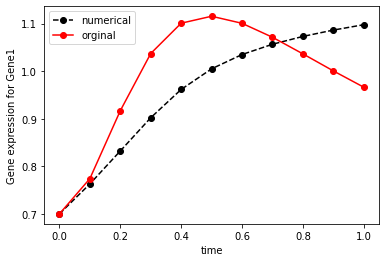

In [75]:
plt.plot(ts, final_gene_expression[:,0], marker='o', color='black', linestyle='dashed'  )
plt.plot(ts, ge_original[:,0], marker='o', color='red')
plt.xlabel('time')
plt.ylabel('Gene expression for Gene1')
plt.legend(('numerical','orginal'))
plt.show()

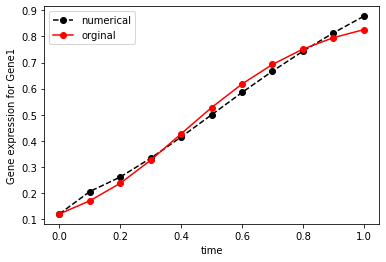

In [76]:
plt.plot(ts, final_gene_expression[:,1], marker='o', color='black', linestyle='dashed'  )
plt.plot(ts, ge_original[:,1], marker='o', color='red')
plt.xlabel('time')
plt.ylabel('Gene expression for Gene1')
plt.legend(('numerical','orginal'))
plt.show()

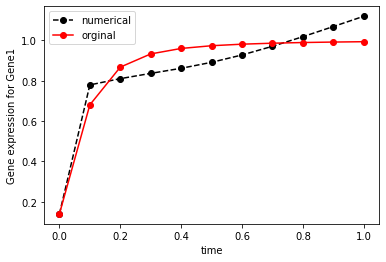

In [77]:
plt.plot(ts, final_gene_expression[:,2], marker='o', color='black', linestyle='dashed'  )
plt.plot(ts, ge_original[:,2], marker='o', color='red')
plt.xlabel('time')
plt.ylabel('Gene expression for Gene1')
plt.legend(('numerical','orginal'))
plt.show()

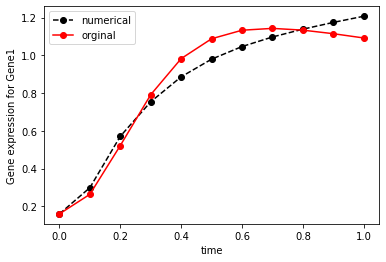

In [78]:
plt.plot(ts, final_gene_expression[:,3], marker='o', color='black', linestyle='dashed'  )
plt.plot(ts, ge_original[:,3], marker='o', color='red')
plt.xlabel('time')
plt.ylabel('Gene expression for Gene1')
plt.legend(('numerical','orginal'))
plt.show()

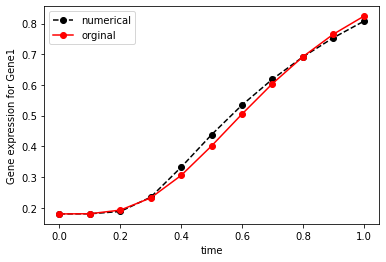

In [79]:
plt.plot(ts, final_gene_expression[:,4], marker='o', color='black', linestyle='dashed'  )
plt.plot(ts, ge_original[:,4], marker='o', color='red')
plt.xlabel('time')
plt.ylabel('Gene expression for Gene1')
plt.legend(('numerical','orginal'))
plt.show()

In [ ]:
(np.array([4,1,2,3,-5])<0).any()

In [ ]:
x=1
y=2

In [ ]:
x,y<1

In [ ]:
abc = random_population()
abcde =  np.array([[ 0.23995412, -25.25395704,  2.20821677,  0.57119182, -2.89922857],
        [-1.45582126,  0.42684459, -2.67608813,  1.84258079, -2.63221532],
        [-0.341528  , -0.78642164,  0.50312521, -0.83162554,  0.80743471],
        [-0.76038282, -1.43018882,  1.25787571,  0.58250259, -2.99517712],
        [-0.37758462, -0.93504208,  0.74771658, -1.32550173, -1.60948487]])

In [ ]:
import numpy as np
abcd = np.array([13.74317507,  58.54779089,  -18.85324073, 12.23335026,  3.65828499])

In [ ]:
cb(abcde,-3,3)

In [ ]:
def cb(parameters, low, high ):
    while((parameters<low).any() or (parameters>high).any()):
        InBounds=[]
        for x in np.nditer(parameters):
            if(x<low):
                InBounds.append(2*low-x)
            elif(x>high):
                InBounds.append(2*high-x)
            else:
                InBounds.append(x)
        parameters = np.array(InBounds).reshape(parameters.shape)
        #print(parameters)
    
    return(parameters)
    
        
        

In [ ]:
(abcd>20).any()

In [ ]:
abcd>20

In [ ]:
A =np.array([ 5,10,10,8,10])
B = np.array([ 10,10,10,10,10])
g = np.array([[ 1,2,0,0,0],
        [0,-1,1,0,0],
        [ -1,0,1,0,0 ],
        [0,-1,-1,-1,0],
        [-1,0,1,0,1]])
h= np.array([[2,0,0,0,0],
        [0,2,0,0,0],
        [0,0,2,0,0],
        [ 0,-1,0,2,1],
        [ -1,0,0,1,2]])

G1 = orginal_gene_expression[:,0]
G2 = orginal_gene_expression[:,1]
G3 = orginal_gene_expression[:,2]
G4 = orginal_gene_expression[:,3]
G5 = orginal_gene_expression[:,4]

t1 = orginal_gene_expression[1]

print(A[0]*(np.prod(np.power(t1,g[0])))-(B[0]*(np.prod(np.power(t1,h[0])))))
print(G1[0])

In [ ]:
orginal_gene_expression[:,1]

In [ ]:

def define_equation(A,B,g,h,Y):
    
    dydt = (A*(np.prod(np.power(Y,g))))-(B*(np.prod(np.power(Y,h))))

    return dydt


def get_dydt(ln):
    CalcGenes = []
    for j in range(n):
        temp = []
        for i in range(len(orginal_gene_expression)):
            temp.append(define_equation(ln['A'][j],ln['B'][j],ln['g'][j],ln['h'][j],orginal_gene_expression[i]))
        CalcGenes.append(temp)
    return(CalcGenes)